# Introduction to Data Science
## Homework 4 

Student Name: Xiang Wang

Student Netid: xw1173
***

### Part 1: Basic evaluations
For this part of the assignment, we are going to use another (different) churn data set, located in `data/churn.csv`. The first 11 columns are predictor variables.

```
COLLEGE                       college educated?
INCOME                        income
OVERAGE                       average overcharges per month
LEFTOVER                      average % leftover minutes per month
HOUSE                         value of dwelling (from census tract)
HANDSET_PRICE                 cost of phone
OVER_15MINS_CALLS_PER_MONTH   average number of long calls per month
AVERAGE_CALL_DURATION         average call duration
REPORTED_SATISFACTION         reported level of satisfaction
REPORTED_USAGE_LEVEL          self-reported usage level
CONSIDERING_CHANGE_OF_PLAN    was customer considering changing plan?
```

The last column, `LEAVE`, is the target variable that equals one if the user left and zero if they stayed.

1\. Load the data into a pandas `DataFrame()`.

In [23]:
import pandas as pd

data = pd.read_csv('data/churn_data.csv')

data.tail()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
11147,0,82056,244,11,964443,297,26,4,avg,little,no,0
11148,0,105890,73,7,397776,820,25,14,avg,little,considering,0
11149,0,153252,0,23,368403,597,1,6,very_sat,little,actively_looking_into_it,0
11150,1,107126,71,82,237397,609,5,2,very_sat,very_little,no,0
11151,0,78674,47,41,572406,288,4,2,very_unsat,little,considering,1


2\. Some of the columns are categorical variables. You have to turn these into zero/one **"dummy" variables**.  

The idea is that for modeling methods like logistic regression which take only numeric inputs, we should change categorical variables. Basically, we must create one (new) **binary variable** for each value of the categorical. Technically if there are k values, we really need only to create new variables for k-1 of the categories, but often we create k new variables with all categories anyway, as that makes the model more interpretable.

The following code is to help you understanding dummy variables, you might need to change it.


In [24]:

for field in ['REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL','CONSIDERING_CHANGE_OF_PLAN']:
    
    #Take all UNIQUE categories from each column 
    
    for value in data[field].unique():
    
    
        # In the DataFrame called "data", create a new column with the original name + the category name
        # This new column will be created by "False" and "True" for each unique value in the field.
        # Then, those True and False values can be transformed into  "integer" (e.g. 1 and 0)
        
        data[field + "_" + value] = pd.Series(data[field] == value,dtype=int)

        
    # Drop the original field (column), we only want to keep the new "dummy variables"
    # Look at the them at the end of the data frame that will be printed after running this cell
    
    data = data.drop([field], axis=1)
    
    
data.tail()


,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,LEAVE,REPORTED_SATISFACTION_unsat,...,REPORTED_USAGE_LEVEL_little,REPORTED_USAGE_LEVEL_very_little,REPORTED_USAGE_LEVEL_high,REPORTED_USAGE_LEVEL_very_high,REPORTED_USAGE_LEVEL_avg,CONSIDERING_CHANGE_OF_PLAN_no,CONSIDERING_CHANGE_OF_PLAN_considering,CONSIDERING_CHANGE_OF_PLAN_perhaps,CONSIDERING_CHANGE_OF_PLAN_never_thought,CONSIDERING_CHANGE_OF_PLAN_actively_looking_into_it
11147,0,82056,244,11,964443,297,26,4,0,0,...,1,0,0,0,0,1,0,0,0,0
11148,0,105890,73,7,397776,820,25,14,0,0,...,1,0,0,0,0,0,1,0,0,0
11149,0,153252,0,23,368403,597,1,6,0,0,...,1,0,0,0,0,0,0,0,0,1
11150,1,107126,71,82,237397,609,5,2,0,0,...,0,1,0,0,0,1,0,0,0,0
11151,0,78674,47,41,572406,288,4,2,1,0,...,1,0,0,0,0,0,1,0,0,0


3\. Put all of the predictors into a data frame called `X` and the target variable in a data frame called `Y`.

In [34]:
X = data.drop(["LEAVE"], axis=1)
Y = data.LEAVE

3\. Create `LogisticRegression()` and `DecisionTreeClassifier()` models. For the tree-structured model, use `criterion="entropy"` and `min_samples_split=50` (the latter to make sure the tree is not making decisions from too few data). For all other settings, keep the default values. 

For these models, obtain the accuracy estimates (average) and standard deviations based on cross-validation with different fold values: 2, 5, 10, 20, 50, and 75. 
Store your results in **lr_all_acc**, **dt_all_acc**, **lr_all_std**, **dt_all_std**

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

lr_model = LogisticRegression()
lr_model.fit(X, Y)

dt_model = DecisionTreeClassifier(min_samples_split=50, criterion="entropy") 
dt_model.fit(X, Y)

cv_number_folds = [2,5,10,20,50,75]

# Logistic regression cross-validation accuracies
lr_all_acc = []   
lr_all_std = []
# Decision tree cross-validation accuracies
dt_all_acc = []
dt_all_std = []

for cv in cv_number_folds:
    lr_scores = cross_val_score(lr_model, X, Y, scoring="accuracy", cv=cv)
    dt_scores = cross_val_score(dt_model, X, Y, scoring="accuracy", cv=cv)
    
    lr_all_acc.append(np.mean(lr_scores))
    lr_all_std.append(np.std(lr_scores))
    
    dt_all_acc.append(np.mean(dt_scores))
    dt_all_std.append(np.std(dt_scores))

# These lines will be used for GRADING. Ensure that they print what they should.

print ( "Logistic regression folds: Mean Accuracy %.4f" % (np.mean(lr_all_acc)))
print ("Tree folds: Mean Accuracy %.4f" % (np.mean(dt_all_acc)) )


Logistic regression folds: Mean Accuracy 0.9098
Tree folds: Mean Accuracy 0.8914


4\. Now **plot** your results: for each modeling method, plot the average generalization performance with +/- one standard deviation error bars.  **Explain** what the graph reveals. ** Explain:** which number of folds would you select and why? 

Here is how the plots should look like  

_Hint:  plt.errorbar might be helpful_

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8

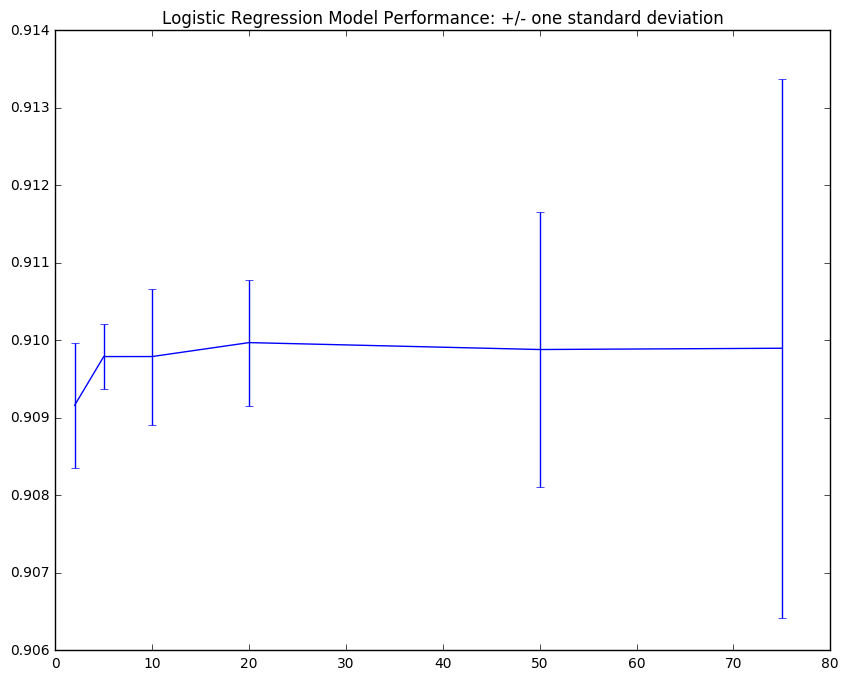

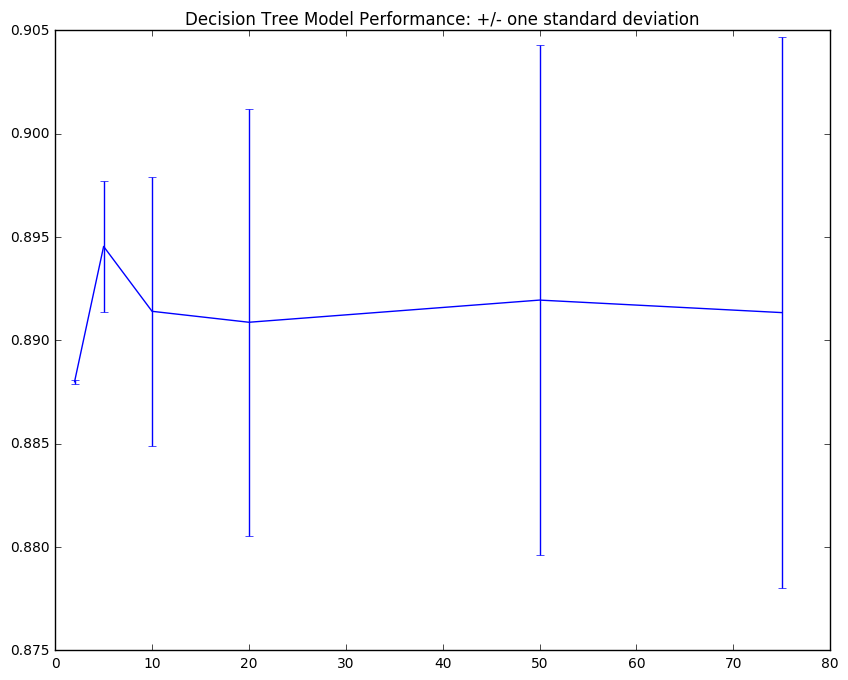

In [41]:
lr_err = lr_all_std
dt_err = dt_all_std

plt.figure()
plt.errorbar(cv_number_folds, lr_all_acc, yerr=lr_err)
plt.title("Logistic Regression Model Performance: +/- one standard deviation")

plt.figure()
plt.errorbar(cv_number_folds, dt_all_acc, yerr=dt_err)
plt.title("Decision Tree Model Performance: +/- one standard deviation")

** Answers here! **

When the fold number is getting higher, the portion of data used for training is larger, which gives more generality for the model, but the piece used for test is getting smaller, which may reduce the generality of test, so there is a tradeoff between these two generalities, which is reflected by the approximately first increasing then decreasing trend for accuracy and high standard deviation at high fold number.

As we can see for logistic regression model we have a good accuracy rate with minimum standard deviation at cv = 5.
Same for decision tree model, cv = 5 is the best choice which gives the highest accuracy and a reasonable standard deviation.

***

5\. Create the same **plots** for a different evaluation metric: Area under the ROC curve (AUC score).  (**Read Chapter 8**) 

**Do you draw the same conclusions?**  Which metric would you prefer for this problem?

In [15]:
cv_number_folds = [2,5,10,20,50,75]

# Logistic regression cross-validation auc
lr_all_auc = []   
lr_all_std = []
# Decision tree cross-validation auc
dt_all_auc = []
dt_all_std = []












** Answer here! **

***

### Part 2: Find the best model

1\. Create `LogisticRegression()` and `DecisionTreeClassifier()` models. For the logistic regression **find the optimal value** for regularization (`C`) using 10-fold cross validation and area under the ROC curve (AUC). Use the same procedure to find the optimal value of `min_samples_split` for the decision tree classifier (criterion='entropy'). For each of these values, try 20 different choices. To show your results, **create two plots**, one for each modeling method, that show the value of AUC on the y-axis and the parameter values you tried on the x-axis. **Don't forget to label your axes!**  

[Hint 1: for a coarse search of the space of complexity parameters a good heuristic is to cover the range with an exponentially increasing set of values.  We're already doing that with C.  How could you get a good coverage of the range of possible min_samples_split?] 

[Hint 2: Plotting with a log scale on the x-axis sometimes helps. Note we're already doing that by plotting C.]

In [ ]:

# Code to test and create a plot for LogisticRegression() here





In [ ]:

# Code to test and create a plot for DecisionTreeClassifier() here





2\. Split your data to create different training sets with size 10%, 20%, 40%, 80%, and 90% of the size of the original data set. Fit two models for the different training sets: decision tree (entropy criteria) and logistic regression. Use the **best parameters** from the previous question and 10-fold cross validation. Plot the **learning curves** for the two models on one plot, including +/- one standard deviation error bars and using auc score.  Use log scale on the x-axis (hint: using basex=2 looks much nicer than the default). Make sure your plot has a legend so that you can tell which curve is related to which model. **Don't forget to label your axes **.  

**Explain what the learning curves reveal**.

In [ ]:

from sklearn.model_selection import train_test_split
sample_sizes = [.1, .2, .4, .8, .9]







### Part 3: Find the best model: **GRID SEARCH**

Ok. So sklearn provides a function that searches for the best modeling paramenters, as you did above.  This is very much "machine learning style" modeling, where as much as possible is inferred from the data--in particular, even the right values for the modeling parameters.

1\. Use the sklearn function GridSearchCV to perform a grid search. This is a search through the modeling parameters that we have been using before (e.g. regularization "c", min_samples_split, ...). They are called "hyper-parameters" and we want to find the best coombination of them for our model (not individually like we did it before).   

This grid-search function uses a Python **dictionary** to lay out the values that we want to search among. 

Then, using the same lists of values that you used above (e.g. all the min_samples_split of Part2, question1), create a dictionary and use it for the grid search.

Example: GridSearchCV( DecisionTreeClassifier(), parameters_dictionary )

[You can find the documentation here](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)


In [ ]:

from sklearn.model_selection import GridSearchCV







2\. Which are the best values for regularization and min_samples_split with this function? Did they change?

3\. Evaluate the grid search again but this time include in the dictionary for logistic regression a list with penalty 'l1' and 'l2'. Also, for the decision tree, include a list of values for "min_samples_leaf= [100, 200, 300, 400, 500, 1000]". 

**What is the best selection for logistic regression and decision tree now?**

*Ok.  One last thing.  In the above analysis, although we found a set of best parameters, we chose them from performance over many cross-validations.  Thus, we made modeling decisions using the test sets.  That's fine for choosing the hyperparameters, but compromises our estimates of the final accuracy (which you did not report).  Technically, if we want good estimates of the accuracy of the resultant models, we should do our evaluation on a test set that was not used to make *any* modeling decisions.  The book discusses "nested cross-validation" as a technique to accomplish this.  This is not required for the homework, but if you want to challenge yourself to do what a top-notch data scientist would do, use nested cross-validation to do the grid search for the best parameters *using data only from the training folds*, and then build the model for the test folds with the chosen parameter.  Or, alternatively, hold out a final test set at the beginning for the final testing.*  


No answer required.